# PROGETTO

## Berlin Airbnb Data

Il dataset considerato contiene numerose informazioni riguardanti gli annunci realtivi agli appartamenti disponibili su Airbnb nella città di Berlino.
Un nuovo host vuole aggiungere un annuncio per il suo alloggio e vuole trovare un prezzo che sia in linea con quelli degli appartamenti con caratteristiche simili.
L'obiettivo di questo progetto è quindi prevedere il prezzo giornaliero di un alloggio, in modo che si adatti alla fetta di mercato a cui appartiene.

Il dataset utilizzato è scaricabile dal seguente link:
https://www.kaggle.com/brittabettendorf/berlin-airbnb-data/download

Ho scelto di utilizzare il CSV *listing_sunmmary*, poichè contiene le informazioni che sono utili al mio scopo. 

Per configurare l'ambiente affinchè il progetto sia funzionante, si faccia riferimento al file REQUIREMENTS

In [55]:
# Import libraries for the analysis
import os
import pandas as pd
import  statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [3]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
# Set constants
BASEPATH = os.path.abspath('')
DATASET = 'listings_summary.csv'
PATH = os.path.join(BASEPATH,DATASET)
print (PATH)

C:\Users\origgfe1\02_Formazione\Corsi\Percorso Data Science\GIT_data_science_fede\data_science_fede\listings_summary.csv


### Import Data

In [5]:
df = pd.read_csv(PATH, low_memory=False)
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


In [6]:
print(f'Il dataset ha {df.shape[0]} righe e {df.shape[1]} colonne.')
print(f'Contiene {df.duplicated().sum()} duplicati.')

Il dataset ha 22552 righe e 96 colonne.
Contiene 0 duplicati.


In [7]:
df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 96, dtype: object

In [8]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

Il numero di colonne è molto ampio, è possibile ridurlo in modo da concentrarsi solo su ciò che è utile al nostro scopo.
Visto che abbiamo ipotizzato di basarci solo sulle caratteristiche dell'alloggio, possiamo tralasciarle le informazioni riguardanti l'host e le review.

In [9]:
cols=['id', 'experiences_offered', 'neighbourhood_cleansed','neighbourhood_group_cleansed', 'latitude', 'longitude',
      'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 
      'square_feet', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
      'maximum_nights', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy']

In [10]:
df_cols = df[cols]

In [11]:
print(f'La colonna id ha {df_cols.id.duplicated().sum()} duplicati.')

La colonna id ha 0 duplicati.


 La colonna id è utilizzabile come indice della tabella.

In [12]:
df_cols.set_index('id')

,experiences_offered,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,instant_bookable,is_business_travel_ready,cancellation_policy
id,,,,,,,,,,,,,,,,,,,,,
2015,none,Brunnenstr. Süd,Mitte,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,1.0,...,$60.00,$200.00,$30.00,1,$28.00,4,1125,f,f,strict_14_with_grace_period
2695,none,Prenzlauer Berg Nordwest,Pankow,52.548513,13.404553,Apartment,Private room,2,1.0,1.0,...,$17.00,$0.00,$0.00,1,$0.00,2,40,f,f,flexible
3176,none,Prenzlauer Berg Südwest,Pankow,52.534996,13.417579,Apartment,Entire home/apt,4,1.0,1.0,...,$90.00,$200.00,$50.00,2,$20.00,62,1125,t,f,strict_14_with_grace_period
3309,none,Schöneberg-Nord,Tempelhof - Schöneberg,52.498855,13.349065,Apartment,Private room,2,1.0,1.0,...,$26.00,$250.00,$30.00,1,$18.00,5,360,f,f,strict_14_with_grace_period
7071,none,Helmholtzplatz,Pankow,52.543157,13.415091,Apartment,Private room,2,1.0,1.0,...,$42.00,$0.00,$0.00,1,$24.00,2,10,f,f,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29856708,none,Brunnenstr. Süd,Mitte,52.533865,13.400731,Apartment,Entire home/apt,2,1.0,1.0,...,$60.00,NaN,NaN,1,$0.00,2,1125,f,f,flexible
29857108,none,Schöneberg-Nord,Tempelhof - Schöneberg,52.496211,13.341738,Apartment,Shared room,6,1.0,1.0,...,$20.00,$0.00,$0.00,1,$10.00,1,14,t,f,flexible
29864272,none,Prenzlauer Berg Südwest,Pankow,52.531800,13.411999,Loft,Entire home/apt,2,1.0,0.0,...,$85.00,NaN,NaN,1,$0.00,3,30,f,f,flexible


In [13]:
print(f'Il dataset ha {df_cols.shape[0]} righe e {df_cols.shape[1]} colonne.')

Il dataset ha 22552 righe e 25 colonne.


In [14]:
df_cols.isnull().sum()

id                                  0
experiences_offered                 0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          32
bedrooms                           18
beds                               40
bed_type                            0
amenities                           0
square_feet                     22106
price                               0
security_deposit                 9361
cleaning_fee                     7146
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
instant_bookable                    0
is_business_travel_ready            0
cancellation_policy                 0
dtype: int64

La colonna *square_feet* contiene troppi valori nulli, possiamo eliminare anche questa dalle nostre analisi.

In [15]:
df_cols = df_cols.drop('square_feet', axis=1)

Per quanto riguarda i valori nulli nelle altre colonne, possiamo ipotizzare che quando non è stato inserito alcun valore per *security_deposit* e/o per *cleaning_fee* non c'è nessun importo da pagare. Perciò sostituiremo i valori nulli con *$0.00*.

In [16]:
df_cols.security_deposit.fillna(value='$0.00', inplace=True)
df_cols.cleaning_fee.fillna(value='$0.00', inplace=True)

In [17]:
display(df_cols.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,22552,NaN,NaN,NaN,1.57156e+07,8.55207e+06,2015,8.06595e+06,1.68664e+07,2.25839e+07,2.98674e+07
experiences_offered,22552,1,none,22552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_cleansed,22552,136,Tempelhofer Vorstadt,1325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group_cleansed,22552,12,Friedrichshain-Kreuzberg,5497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,22552,NaN,NaN,NaN,52.5098,0.0308255,52.3458,52.4891,52.5091,52.5327,52.6517
longitude,22552,NaN,NaN,NaN,13.4061,0.0579637,13.1036,13.3754,13.4168,13.4393,13.7576
property_type,22552,33,Apartment,20225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_type,22552,3,Private room,11534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,22552,NaN,NaN,NaN,2.63746,1.51055,1,2,2,3,16
bathrooms,22520,NaN,NaN,NaN,1.0927,0.329894,0,1,1,1,8.5


In [18]:
#ok
df_cols.loc[(df_cols.bedrooms.isnull()) & (df_cols.bathrooms.isnull())]

,id,experiences_offered,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,instant_bookable,is_business_travel_ready,cancellation_policy


In [19]:
#ok
df_cols.loc[(df_cols.bedrooms == 0) & (df_cols.beds.isnull())]

,id,experiences_offered,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,instant_bookable,is_business_travel_ready,cancellation_policy
10541,15933853,none,Neuköllner Mitte/Zentrum,Neukölln,52.481488,13.431397,Apartment,Entire home/apt,1,1.0,...,$23.00,$0.00,$0.00,1,$0.00,1,7,f,f,flexible
12624,18614171,none,Alexanderplatz,Mitte,52.511231,13.424516,Loft,Private room,2,2.0,...,$60.00,$100.00,$20.00,1,$20.00,1,1125,f,f,moderate


In [20]:
#ok
idx = df_cols.loc[(df_cols.bedrooms == 0) & (df_cols.beds.isnull())].index
df_cols.drop(idx, inplace=True)

In [21]:
#ok
df_cols.loc[(df_cols.bedrooms == 0) & (df_cols.beds.isnull())]

,id,experiences_offered,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,instant_bookable,is_business_travel_ready,cancellation_policy


In [22]:
df_cols.isnull().sum()

id                               0
experiences_offered              0
neighbourhood_cleansed           0
neighbourhood_group_cleansed     0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                       32
bedrooms                        18
beds                            38
bed_type                         0
amenities                        0
price                            0
security_deposit                 0
cleaning_fee                     0
guests_included                  0
extra_people                     0
minimum_nights                   0
maximum_nights                   0
instant_bookable                 0
is_business_travel_ready         0
cancellation_policy              0
dtype: int64

In [23]:
#ok
df_cols.loc[(df_cols.bathrooms != 0) & (df_cols.bedrooms == 0)].beds.unique()
#-->posso sostituire 0 alle camere null

array([1., 2., 3., 4., 6., 5., 0.])

In [24]:
#ok
df_cols.loc[(df_cols.bathrooms == 0) & (df_cols.bedrooms != 0)].beds.unique()
#--> posso sostituire 0 ai bagni null

array([1., 2., 3., 4., 6., 8.])

In [25]:
#ok
df_cols.loc[df_cols.bathrooms.isnull()].bedrooms.unique()

array([1., 2.])

In [26]:
#ok
df_cols.loc[df_cols.bedrooms.isnull()].bathrooms.unique()

array([1. , 1.5])

Sostituisco il numero di letti con la mediana del numero di letti. Visto che non ci sono annunci che hanno sia camere che bagni null, se la camera è null c'è il bagno e se il bagno è null c'è la camera --> esistono già alcune camere con bagno 0 e camera <> 0 e viceversa. Quinid metto a zero quelli che hanno camera o bagno null.

In [27]:
df_cols.beds = df_cols.beds.fillna(df_cols.bedrooms.median())
df_cols.beds.isnull().sum()

0

In [28]:
df_cols.isnull().sum()

id                               0
experiences_offered              0
neighbourhood_cleansed           0
neighbourhood_group_cleansed     0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                       32
bedrooms                        18
beds                             0
bed_type                         0
amenities                        0
price                            0
security_deposit                 0
cleaning_fee                     0
guests_included                  0
extra_people                     0
minimum_nights                   0
maximum_nights                   0
instant_bookable                 0
is_business_travel_ready         0
cancellation_policy              0
dtype: int64

In [29]:
#Replace null numbers in dataframe columns
def replace_null_numbers(dataframe, columns):
    result = pd.DataFrame()
    if isinstance(columns, list):
        for i,col in enumerate(columns):
            print(f'Column: {i}, name: {col}')
            dataframe.fillna({col:0}, inplace=True)
            #replacing all NaN values in 'reviews_per_month' with 0

            #check column is null
            dataframe[col].isnull().sum()

            result = dataframe
        return result
    else:
        print("Please usa a list of columns to delete")
        return None


In [30]:
replace_null_numbers(df_cols, ['bathrooms', 'bedrooms'])

Column: 0, name: bathrooms
Column: 1, name: bedrooms


,id,experiences_offered,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,instant_bookable,is_business_travel_ready,cancellation_policy
0,2015,none,Brunnenstr. Süd,Mitte,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,...,$60.00,$200.00,$30.00,1,$28.00,4,1125,f,f,strict_14_with_grace_period
1,2695,none,Prenzlauer Berg Nordwest,Pankow,52.548513,13.404553,Apartment,Private room,2,1.0,...,$17.00,$0.00,$0.00,1,$0.00,2,40,f,f,flexible
2,3176,none,Prenzlauer Berg Südwest,Pankow,52.534996,13.417579,Apartment,Entire home/apt,4,1.0,...,$90.00,$200.00,$50.00,2,$20.00,62,1125,t,f,strict_14_with_grace_period
3,3309,none,Schöneberg-Nord,Tempelhof - Schöneberg,52.498855,13.349065,Apartment,Private room,2,1.0,...,$26.00,$250.00,$30.00,1,$18.00,5,360,f,f,strict_14_with_grace_period
4,7071,none,Helmholtzplatz,Pankow,52.543157,13.415091,Apartment,Private room,2,1.0,...,$42.00,$0.00,$0.00,1,$24.00,2,10,f,f,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,29856708,none,Brunnenstr. Süd,Mitte,52.533865,13.400731,Apartment,Entire home/apt,2,1.0,...,$60.00,$0.00,$0.00,1,$0.00,2,1125,f,f,flexible
22548,29857108,none,Schöneberg-Nord,Tempelhof - Schöneberg,52.496211,13.341738,Apartment,Shared room,6,1.0,...,$20.00,$0.00,$0.00,1,$10.00,1,14,t,f,flexible
22549,29864272,none,Prenzlauer Berg Südwest,Pankow,52.531800,13.411999,Loft,Entire home/apt,2,1.0,...,$85.00,$0.00,$0.00,1,$0.00,3,30,f,f,flexible
22550,29866805,none,Alexanderplatz,Mitte,52.520802,13.378688,Boutique hotel,Private room,2,1.0,...,$99.00,$0.00,$0.00,1,$0.00,1,10,f,f,flexible


In [31]:
df_cols.isnull().sum()

id                              0
experiences_offered             0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
price                           0
security_deposit                0
cleaning_fee                    0
guests_included                 0
extra_people                    0
minimum_nights                  0
maximum_nights                  0
instant_bookable                0
is_business_travel_ready        0
cancellation_policy             0
dtype: int64

In [32]:
print(f'Il dataset ha {df_cols.shape[0]} righe e {df_cols.shape[1]} colonne dopo la puizia dei dati.')

Il dataset ha 22550 righe e 24 colonne dopo la puizia dei dati.


Visto che il prezzo è in realtà una variabile numerica, andiamo ad eliminare il *$* e il separatore delle migliaia, in modo da poter traformare la colonna in tipo numerico.

In [33]:
df_cols['price'] = df_cols['price'].str.replace('$','').str.replace(',','').astype(float)
df_cols['security_deposit'] = df_cols['security_deposit'].str.replace('$','').str.replace(',','').astype(float)
df_cols['cleaning_fee'] = df_cols['cleaning_fee'].str.replace('$','').str.replace(',','').astype(float)
df_cols['extra_people'] = df_cols['extra_people'].str.replace('$','').str.replace(',','').astype(float)

In [34]:
df_cols.dtypes

id                                int64
experiences_offered              object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
bed_type                         object
amenities                        object
price                           float64
security_deposit                float64
cleaning_fee                    float64
guests_included                   int64
extra_people                    float64
minimum_nights                    int64
maximum_nights                    int64
instant_bookable                 object
is_business_travel_ready         object
cancellation_policy              object
dtype: object

In [35]:
def check_unique(dataframe,columns):
    
    if isinstance(columns,list):
        
        for i,col in enumerate(columns):
            
            print(f'\nColumn: {col}')
            print(dataframe[col].unique())
            
    else:
        print("Input columns must be a list")
        return None

In [36]:
check_unique(df_cols,['experiences_offered','property_type','room_type','bed_type','amenities','instant_bookable','is_business_travel_ready','cancellation_policy']);


Column: experiences_offered
['none']

Column: property_type
['Guesthouse' 'Apartment' 'Condominium' 'Loft' 'House'
 'Serviced apartment' 'Townhouse' 'Boutique hotel' 'Bed and breakfast'
 'Bungalow' 'Boat' 'Guest suite' 'Other' 'Island' 'Hostel' 'Train'
 'Camper/RV' 'Houseboat' 'Cabin' 'Cottage' 'Tiny house' 'Chalet' 'Castle'
 'Villa' 'Aparthotel' 'Hotel' 'Tipi' 'Resort' 'In-law' 'Cave' 'Barn'
 'Pension (South Korea)' 'Casa particular (Cuba)']

Column: room_type
['Entire home/apt' 'Private room' 'Shared room']

Column: bed_type
['Real Bed' 'Pull-out Sofa' 'Couch' 'Futon' 'Airbed']

Column: amenities
['{TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Family/kid friendly","Smoke detector",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Private living room",Bathtub,"Hot water","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Stove,"Luggage dropoff allowed","Long term

Le colonne *experiences_offered* e *is_business_travel_ready* non ci forniscono alcuna informazione, in quanto è sempre *none* e *f*. Eliminiamole dal dataset.

In [37]:
df_cols = df_cols.drop('experiences_offered', axis=1)
df_cols = df_cols.drop('is_business_travel_ready', axis=1)

In [38]:
zone=df_cols.neighbourhood_group_cleansed.value_counts()
zone

Friedrichshain-Kreuzberg    5497
Mitte                       4630
Pankow                      3541
Neukölln                    3498
Charlottenburg-Wilm.        1592
Tempelhof - Schöneberg      1560
Lichtenberg                  688
Treptow - Köpenick           595
Steglitz - Zehlendorf        437
Reinickendorf                247
Marzahn - Hellersdorf        141
Spandau                      124
Name: neighbourhood_group_cleansed, dtype: int64

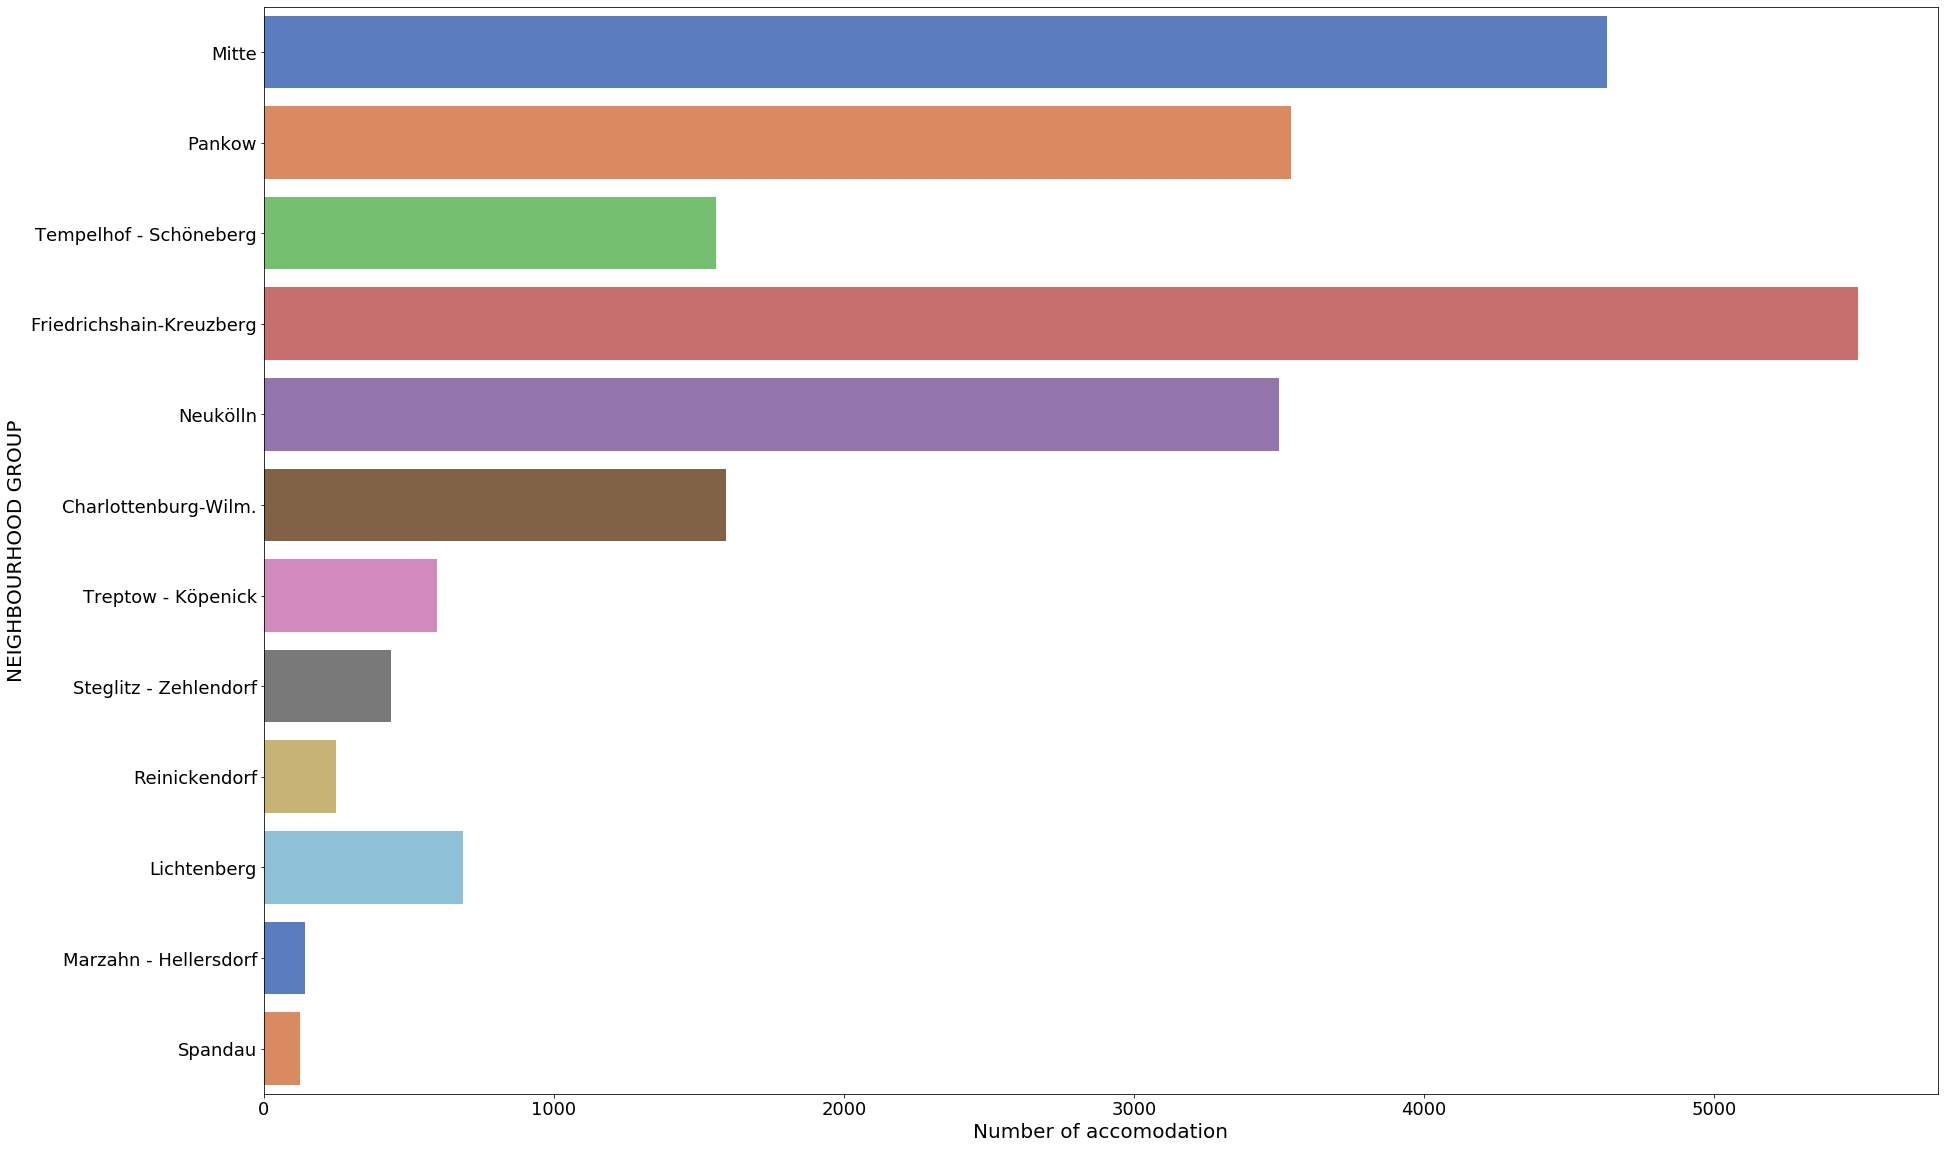

In [39]:
plt.figure(figsize=(30,20))
ax = sns.countplot(y=df["neighbourhood_group_cleansed"], palette="muted") 
ax.set_xlabel("Number of accomodation",fontsize=20)
ax.set_ylabel("NEIGHBOURHOOD GROUP",fontsize=20)
ax.tick_params(labelsize=18)

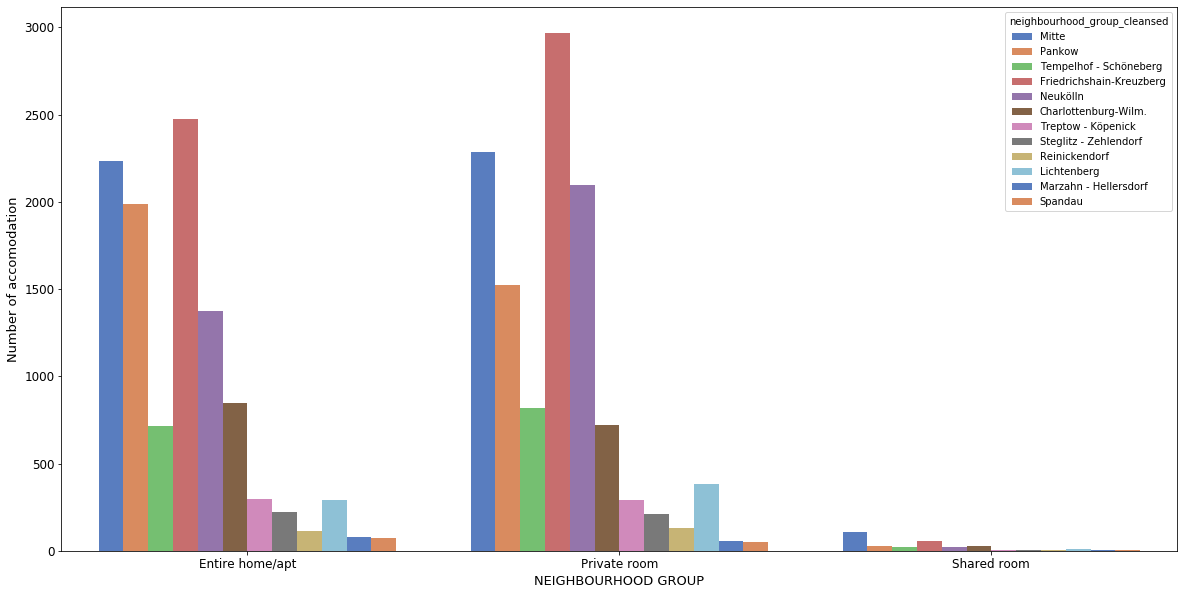

In [40]:
plt.figure(figsize=(20,10))
ax = sns.countplot(df['room_type'],hue=df['neighbourhood_group_cleansed'], palette='muted')
ax.set_xlabel("NEIGHBOURHOOD GROUP",fontsize=13)
ax.set_ylabel("Number of accomodation",fontsize=13)
ax.tick_params(labelsize=12)

In [41]:
price_avg=df_cols.price.mean()
print('Prezzo medio per notte: {}'.format(price_avg))

Prezzo medio per notte: 67.14594235033259


In [43]:
df_cols.groupby(['neighbourhood_group_cleansed','room_type']).agg(
    avg_price_room=pd.NamedAgg(column='price', aggfunc='mean'),
    avg_price_cleaning=pd.NamedAgg(column='cleaning_fee', aggfunc='mean'),
    avg_price_deposit=pd.NamedAgg(column='security_deposit', aggfunc='mean'),
    avg_price_extra_people=pd.NamedAgg(column='extra_people', aggfunc='mean'))

avg_price_room  \
neighbourhood_group_cleansed room_type                         
Charlottenburg-Wilm.         Entire home/apt      104.386792   
                             Private room         128.621697   
                             Shared room           36.800000   
Friedrichshain-Kreuzberg     Entire home/apt       80.951111   
                             Private room          44.445568   
                             Shared room           39.127273   
Lichtenberg                  Entire home/apt       69.211604   
                             Private room          47.007833   
                             Shared room           26.916667   
Marzahn - Hellersdorf        Entire home/apt       74.862500   
                             Private room          33.428571   
                             Shared room           21.200000   
Mitte                        Entire home/apt       99.936494   
                             Private room          41.984259   
                             Shared room           30.299065   
Neukölln                     Entire home/apt       64.251636   
                             Private room          35.179133   
                             Shared room           30.375000   
Pankow                       Entire home/apt       80.499497   
                             Private room          48.504924   
                             Shared room          208.466667   
Reinickendorf                Entire home/apt       62.121739   
                             Private room          35.539062   
                             Shared room           57.000000   
Spandau                      Entire home/apt       76.125000   
                             Private room          33.166667   
                             Shared room           37.000000   
Steglitz - Zehlendorf        Entire home/apt       76.004464   
                             Private room          35.767773   
                             Shared room           21.500000   
Tempelhof - Schöneberg       Entire home/apt       79.023710   
                             Private room         113.495726   
                             Shared room           43.333333   
Treptow - Köpenick           Entire home/apt       68.305369   
                             Private room          36.300341   
                             Shared room           19.500000   

                                              avg_price_cleaning  \
neighbourhood_group_cleansed room_type                             
Charlottenburg-Wilm.         Entire home/apt           34.908019   
                             Private room               9.456189   
                             Shared room               10.000000   
Friedrichshain-Kreuzberg     Entire home/apt           26.196364   
                             Private room               9.579710   
                             Shared room                7.254545   
Lichtenberg                  Entire home/apt           21.529010   
                             Private room               7.618799   
                             Shared room                5.833333   
Marzahn - Hellersdorf        Entire home/apt           22.350000   
                             Private room               8.232143   
                             Shared room               14.000000   
Mitte                        Entire home/apt           32.730322   
                             Private room               9.127678   
                             Shared room                3.700935   
Neukölln                     Entire home/apt           19.171636   
                             Private room               8.688423   
                             Shared room                4.916667   
Pankow                       Entire home/apt           29.154427   
                             Private room              10.996717   
                             Shared room                9.333333   
Reinickendorf                Entire home/apt     

In [54]:
fig = px.scatter_mapbox(df_cols[df_cols.price<100], lat="latitude", lon="longitude", color="price", size="bedrooms",
                  color_continuous_scale=px.colors.sequential.RdPu, size_max=15, zoom=11)
#fig.update_layout(title="Distribuzione degli alloggi con indicazione di prezzo e numero di camere\n")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Machine Learning

In [44]:
#è meglio tagliare il dataset con valori minori di 1000???

In [45]:
#boxplot price by neighbourhood
#heatmap Median Prices by Neighbourhood and Number of Bedrooms
# histogram Median Prices by Cancellation Policy

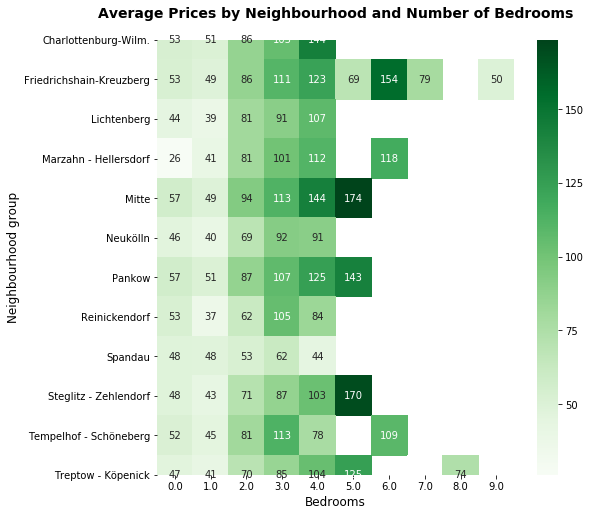

In [46]:
plt.figure(figsize=(8,8))
sns.heatmap(df_cols[df_cols.price<200].groupby(['neighbourhood_group_cleansed', 'bedrooms']).price.mean().unstack(), cmap='Greens', annot=True, fmt=".0f")

plt.xlabel('Bedrooms', fontsize=12)
plt.ylabel('Neighbourhood group', fontsize=12)
plt.title('Average Prices by Neighbourhood and Number of Bedrooms\n', fontsize=14, fontweight='bold');

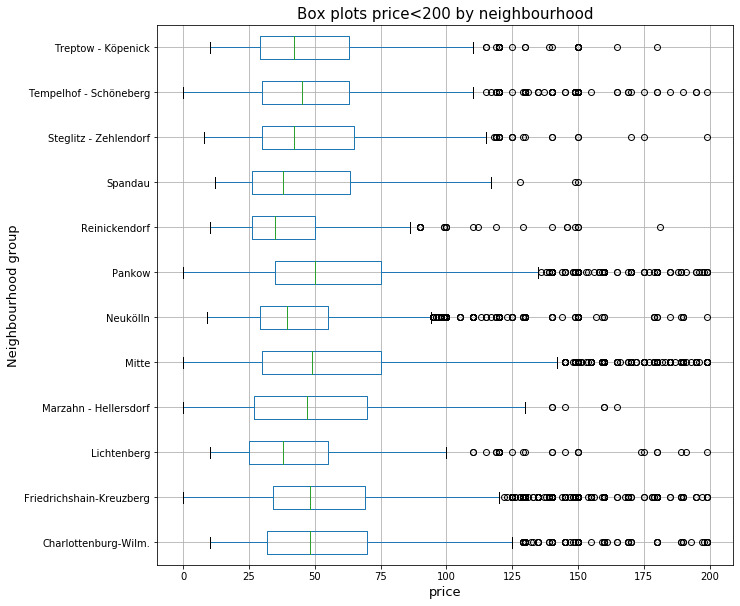

In [56]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
df_cols[df_cols.price<200].boxplot(column=['price'], by='neighbourhood_group_cleansed', ax=ax, vert=False)
fig.suptitle('')
ax.set_title('Box plots price<200 by neighbourhood', fontsize=15) # Give the plot a main title
ax.set_xlabel('price',fontsize=13) # Set text for the x axis
ax.set_ylabel('Neighbourhood group',fontsize=13)# Set text for y axis
plt.show()

#df_cols.boxplot(column=['price'], by='neighbourhood_group_cleansed')

Text(0.5, 0, 'log(1+price)')

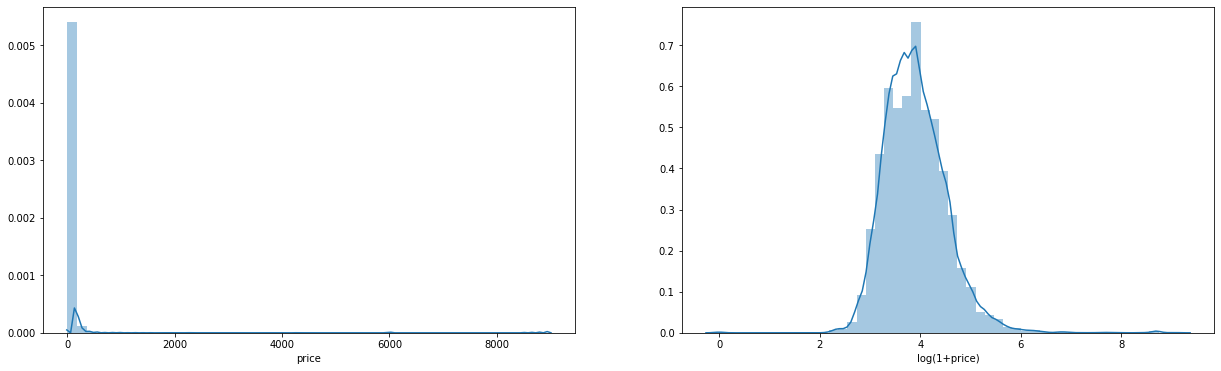

In [57]:
fig, axes = plt.subplots(1,2, figsize=(21,6))

sns.distplot(df_cols['price'], ax=axes[0])
sns.distplot(np.log1p(df_cols['price']), ax=axes[1])

axes[1].set_xlabel('log(1+price)')


In [58]:
df_cols['price'] = np.log1p(df_cols['price'])

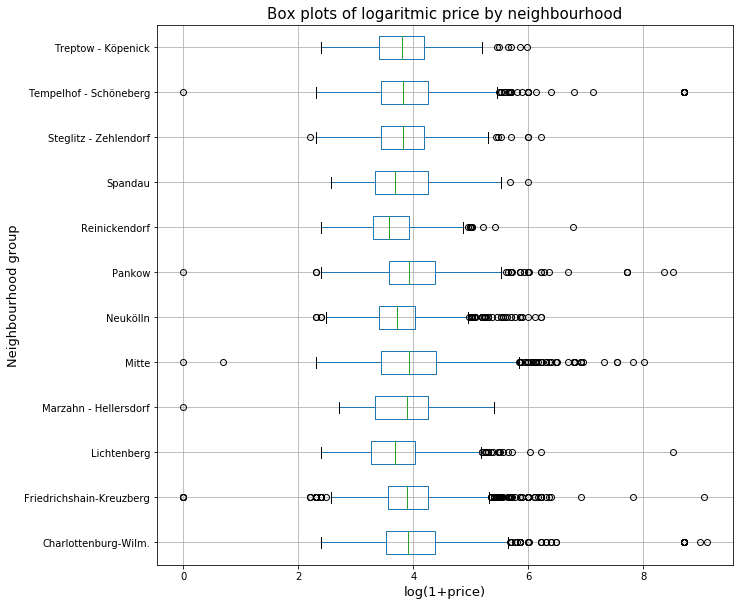

In [59]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
df_cols.boxplot(column=['price'], by='neighbourhood_group_cleansed', ax=ax, vert=False)
fig.suptitle('')
ax.set_title('Box plots of logaritmic price by neighbourhood', fontsize=15) # Give the plot a main title
ax.set_xlabel('log(1+price)',fontsize=13) # Set text for the x axis
ax.set_ylabel('Neighbourhood group',fontsize=13)# Set text for y axis
plt.show()

In [60]:
#Relazione tra prezzo, numero di camere e tipo di camera

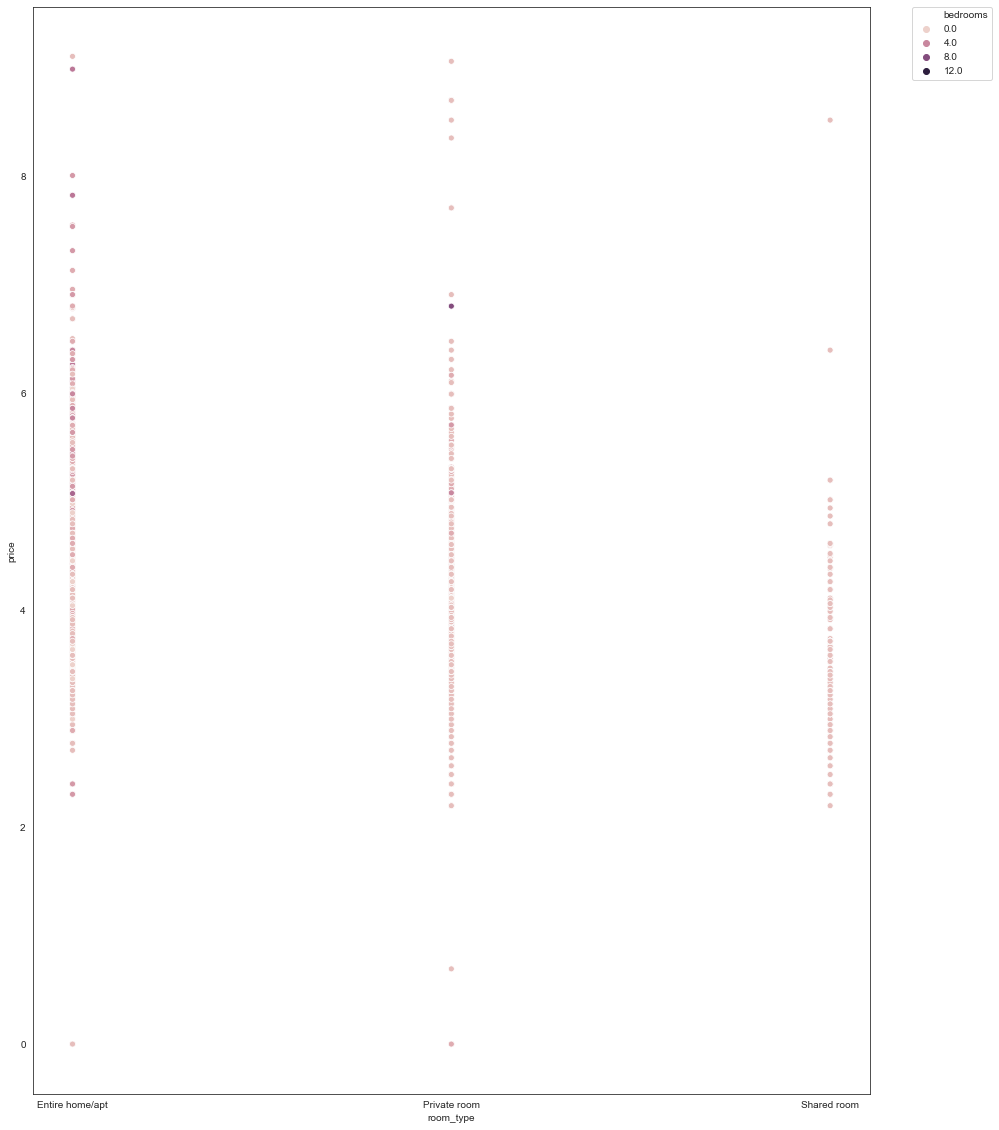

In [61]:
sns.set_style("white")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

fig, ax = plt.subplots(figsize=(15,20))
ax = sns.scatterplot(x="room_type", y="price", hue='bedrooms', sizes=(5, 200),  data=df_cols[df_cols.price<100])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


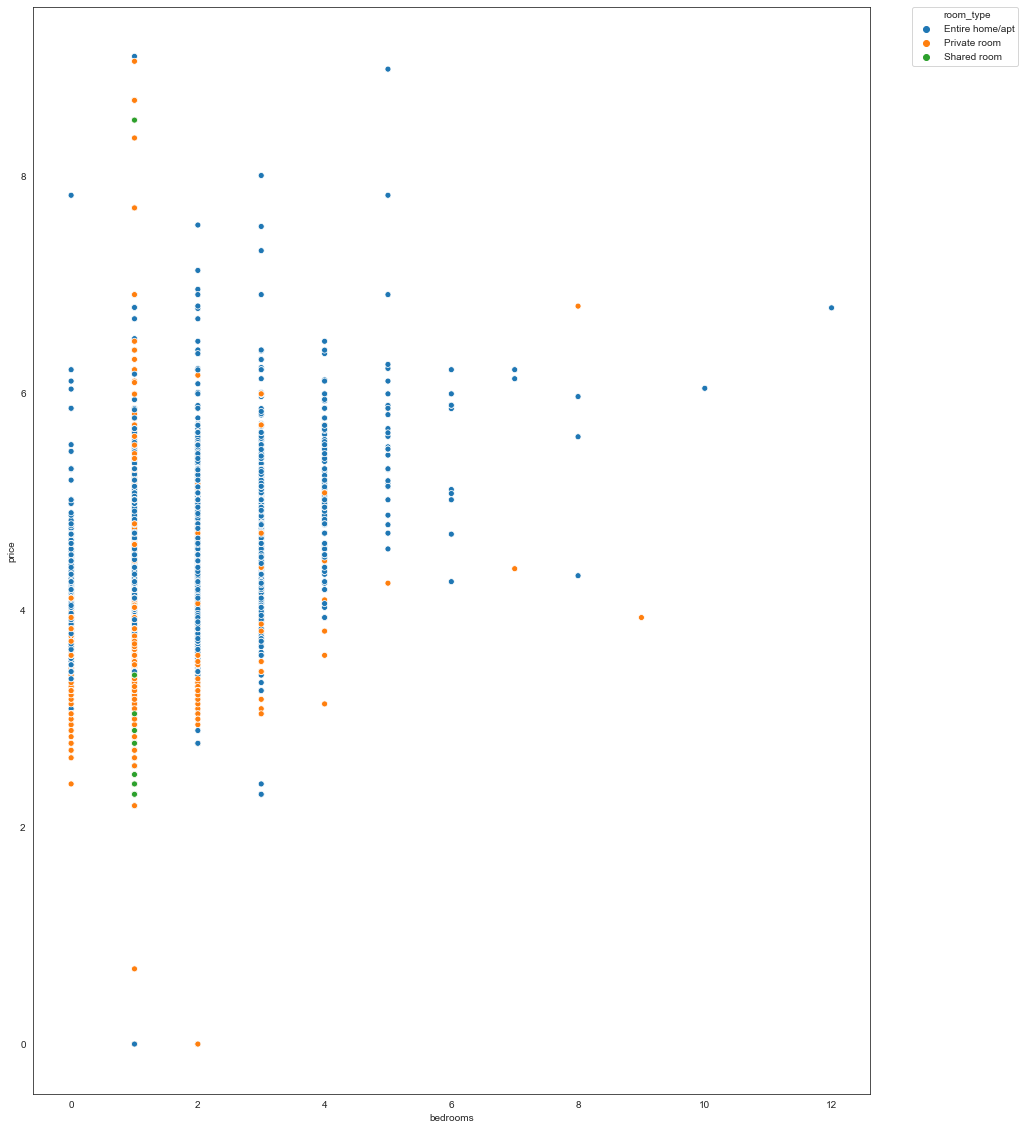

In [62]:
sns.set_style("white")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

fig, ax = plt.subplots(figsize=(15,20))
ax = sns.scatterplot(x="bedrooms", y="price", hue="room_type", sizes=(5, 200),  data=df_cols[df_cols.price<100])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

Ora è necessario valutare la correlazione tra variabili, in modo da definire meglio le feature da selezionare

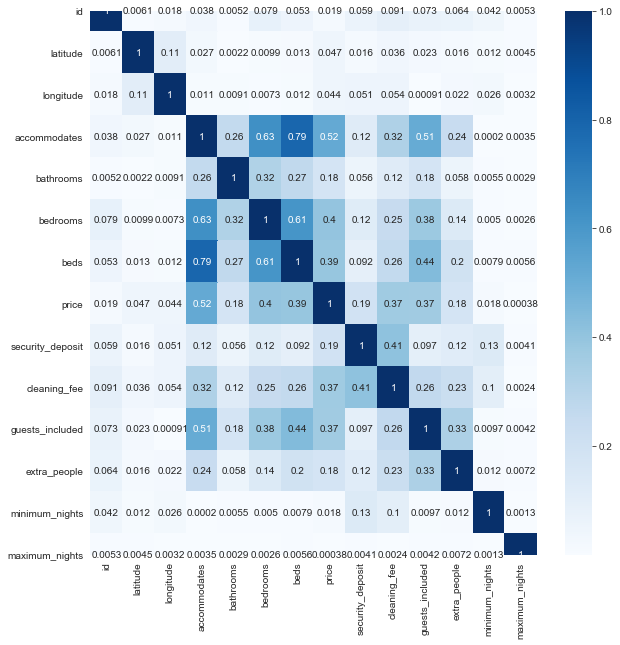

In [63]:
plt.figure(figsize=(10,10))
cor = abs(df_cols.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

Come si può notare dalla matrice di correlazione, ci sono alcune variabili che sono fortemente correlate.
Le correlazioni più alte si hanno tra il numero di persone ospitate, il numero di letti e il numero di camere, considerazione che potevamo aspettarci.
La correlazione più alta si ha tra il numero di letti (*beds*) e il numero di ospiti (*accommodates*). A seguire, il numero di camere (*bedrooms*) è correlato con il numero di ospiti (*accommodates*) e il numero di letti (*beds*).
Infine, si hanno livelli di correlazione abbastanza alti anche tra ospiti aggiuntivi (*guest_included*) e il numero di ospiti, di camere e di letti.

Le variabili che invece non risultano correlate a nessuna altra variabile sono le coordinate spaziali (*latitude*, *longitude*) e il numero massimo e minimo di notti in cui si può soggiornare (*minimum_nights*, *maximum_nights*)


Visto l'elevato livello di correlazione, si può ulteriormente raffinare il numero di colonne che andremo ad utilizzare per il nostro scopo di predire il prezzo di un alloggio con determinate caratteristiche.
Posso andare ad eliminare le variabili *accommodates*, *beds* e *guest_included*.

In [64]:
df_cols = df_cols.drop(['accommodates', 'beds', 'guests_included'], axis=1)
df_cols.head()

,id,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,bathrooms,bedrooms,bed_type,amenities,price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,2015,Brunnenstr. Süd,Mitte,52.534537,13.402557,Guesthouse,Entire home/apt,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",4.110874,200.0,30.0,28.0,4,1125,f,strict_14_with_grace_period
1,2695,Prenzlauer Berg Nordwest,Pankow,52.548513,13.404553,Apartment,Private room,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",2.890372,0.0,0.0,0.0,2,40,f,flexible
2,3176,Prenzlauer Berg Südwest,Pankow,52.534996,13.417579,Apartment,Entire home/apt,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",4.510860,200.0,50.0,20.0,62,1125,t,strict_14_with_grace_period
3,3309,Schöneberg-Nord,Tempelhof - Schöneberg,52.498855,13.349065,Apartment,Private room,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",3.295837,250.0,30.0,18.0,5,360,f,strict_14_with_grace_period
4,7071,Helmholtzplatz,Pankow,52.543157,13.415091,Apartment,Private room,1.0,1.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",3.761200,0.0,0.0,24.0,2,10,f,moderate


Dal dataset che è stato fino ad ora costruito, eliminiamo anche la colonna *amenities*, in quanto sarebbe necessaria un'analisi più approfondita per estrarre i servizi disponibili in ogni alloggio.

In [65]:
df_cols = df_cols.drop(['amenities'], axis=1)
df_cols.head()

,id,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,bathrooms,bedrooms,bed_type,price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,2015,Brunnenstr. Süd,Mitte,52.534537,13.402557,Guesthouse,Entire home/apt,1.0,1.0,Real Bed,4.110874,200.0,30.0,28.0,4,1125,f,strict_14_with_grace_period
1,2695,Prenzlauer Berg Nordwest,Pankow,52.548513,13.404553,Apartment,Private room,1.0,1.0,Real Bed,2.890372,0.0,0.0,0.0,2,40,f,flexible
2,3176,Prenzlauer Berg Südwest,Pankow,52.534996,13.417579,Apartment,Entire home/apt,1.0,1.0,Real Bed,4.510860,200.0,50.0,20.0,62,1125,t,strict_14_with_grace_period
3,3309,Schöneberg-Nord,Tempelhof - Schöneberg,52.498855,13.349065,Apartment,Private room,1.0,1.0,Pull-out Sofa,3.295837,250.0,30.0,18.0,5,360,f,strict_14_with_grace_period
4,7071,Helmholtzplatz,Pankow,52.543157,13.415091,Apartment,Private room,1.0,1.0,Real Bed,3.761200,0.0,0.0,24.0,2,10,f,moderate


Visto che abbiamo la latitudine e la longitudine, possiamo eliminare le colonne *neighbourhood_cleansed* e *neighbourhood_group_cleansed* che forniscono anche loro indicazioni sulla posizione

In [74]:
df_cols = df_cols.drop(['neighbourhood_cleansed','neighbourhood_group_cleansed'], axis=1)
df_cols.head()

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,bed_type,price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,2015,52.534537,13.402557,Guesthouse,Entire home/apt,1.0,1.0,Real Bed,4.110874,200.0,30.0,28.0,4,1125,f,strict_14_with_grace_period
1,2695,52.548513,13.404553,Apartment,Private room,1.0,1.0,Real Bed,2.890372,0.0,0.0,0.0,2,40,f,flexible
2,3176,52.534996,13.417579,Apartment,Entire home/apt,1.0,1.0,Real Bed,4.510860,200.0,50.0,20.0,62,1125,t,strict_14_with_grace_period
3,3309,52.498855,13.349065,Apartment,Private room,1.0,1.0,Pull-out Sofa,3.295837,250.0,30.0,18.0,5,360,f,strict_14_with_grace_period
4,7071,52.543157,13.415091,Apartment,Private room,1.0,1.0,Real Bed,3.761200,0.0,0.0,24.0,2,10,f,moderate


In [66]:
#!!!!! Dividere le colonne categoriche con il dummies!!!!!!!!

In [68]:
def calc_missing(df_ml):
    total = df_ml.isnull().sum().sort_values(ascending=False)
    percent = (df_ml.isnull().sum())/df_ml.isnull().count().sort_values(ascending=False)

    missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False
                                ).sort_values('Total', ascending=False)

    return missing_data
calc_missing(df_cols)

,Total,Percent
cancellation_policy,0,0.0
instant_bookable,0,0.0
maximum_nights,0,0.0
minimum_nights,0,0.0
extra_people,0,0.0
cleaning_fee,0,0.0
security_deposit,0,0.0
price,0,0.0
bed_type,0,0.0
bedrooms,0,0.0


Visto che alcuni modelli non trattano le features categoriche, è necessario trasformarle in forma numerica. Per fare ciò devono essere considerate come variabili dummy.